In [1]:
import boto3
import pandas as pd; pd.set_option('display.max_columns', 200)
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

s3 = boto3.resource('s3')
bucket_name = 'analytics-data-science-competitions'
bucket = s3.Bucket(bucket_name)

## Defining files names
file_key_1 = 'Store-Sales-Time-Series-Forecast/oil.csv'
file_key_2 = 'Store-Sales-Time-Series-Forecast/holidays_events.csv'
file_key_3 = 'Store-Sales-Time-Series-Forecast/stores.csv'
file_key_4 = 'Store-Sales-Time-Series-Forecast/transactions.csv'
file_key_5 = 'Store-Sales-Time-Series-Forecast/train.csv'
file_key_6 = 'Store-Sales-Time-Series-Forecast/test.csv'

bucket_object_1 = bucket.Object(file_key_1)
file_object_1 = bucket_object_1.get()
file_content_stream_1 = file_object_1.get('Body')

bucket_object_2 = bucket.Object(file_key_2)
file_object_2 = bucket_object_2.get()
file_content_stream_2 = file_object_2.get('Body')

bucket_object_3 = bucket.Object(file_key_3)
file_object_3 = bucket_object_3.get()
file_content_stream_3 = file_object_3.get('Body')

bucket_object_4 = bucket.Object(file_key_4)
file_object_4 = bucket_object_4.get()
file_content_stream_4 = file_object_4.get('Body')

bucket_object_5 = bucket.Object(file_key_5)
file_object_5 = bucket_object_5.get()
file_content_stream_5 = file_object_5.get('Body')

bucket_object_6 = bucket.Object(file_key_6)
file_object_6 = bucket_object_6.get()
file_content_stream_6 = file_object_6.get('Body')

## Reading data-files
oil = pd.read_csv(file_content_stream_1)
holidays = pd.read_csv(file_content_stream_2)
stores = pd.read_csv(file_content_stream_3)
transactions = pd.read_csv(file_content_stream_4)
train = pd.read_csv(file_content_stream_5)
test = pd.read_csv(file_content_stream_6)

## Visualizing oil prices

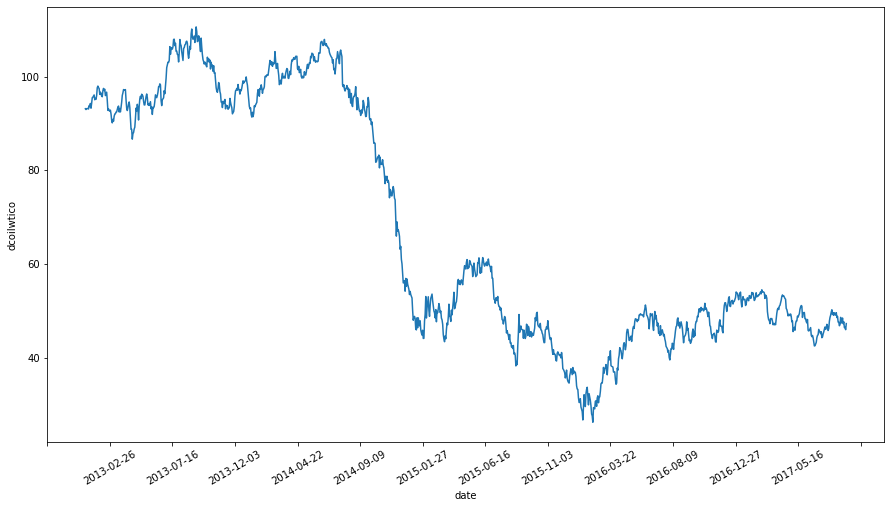

In [2]:
plt.figure(figsize = (15, 8))
ax = sns.lineplot(data = oil, x = 'date', y = 'dcoilwtico')
start, end = ax.get_xlim()
ax.set_xticks(np.arange(start, end, 100))
plt.xticks(rotation = 30);

## Holidays

In [3]:
holidays.columns = ['date', 'holiday_type', 'locale', 'locale_name', 'description', 'transferred']
holidays.head()

,date,holiday_type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False


In [4]:
holidays['holiday_type'].value_counts()

Holiday       221
Event          56
Additional     51
Transfer       12
Bridge          5
Work Day        5
Name: holiday_type, dtype: int64

## Stores

In [5]:
stores.columns = ['store_nbr', 'city', 'state', 'store_type', 'cluster']
stores.head()

,store_nbr,city,state,store_type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4


In [6]:
stores['store_type'].value_counts()

D    18
C    15
A     9
B     8
E     4
Name: store_type, dtype: int64

In [7]:
stores['cluster'].value_counts()

3     7
6     6
10    6
15    5
13    4
14    4
11    3
4     3
8     3
1     3
9     2
7     2
2     2
12    1
5     1
16    1
17    1
Name: cluster, dtype: int64

## Train

In [8]:
train = pd.merge(train, oil, on = 'date', how = 'left')
train = pd.merge(train, holidays, on = 'date', how = 'left')
train = pd.merge(train, stores, on = 'store_nbr', how = 'left')
train.head()

,id,date,store_nbr,family,sales,onpromotion,dcoilwtico,holiday_type,locale,locale_name,description,transferred,city,state,store_type,cluster
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,NaN,Holiday,National,Ecuador,Primer dia del ano,False,Quito,Pichincha,D,13
1,1,2013-01-01,1,BABY CARE,0.0,0,NaN,Holiday,National,Ecuador,Primer dia del ano,False,Quito,Pichincha,D,13
2,2,2013-01-01,1,BEAUTY,0.0,0,NaN,Holiday,National,Ecuador,Primer dia del ano,False,Quito,Pichincha,D,13
3,3,2013-01-01,1,BEVERAGES,0.0,0,NaN,Holiday,National,Ecuador,Primer dia del ano,False,Quito,Pichincha,D,13
4,4,2013-01-01,1,BOOKS,0.0,0,NaN,Holiday,National,Ecuador,Primer dia del ano,False,Quito,Pichincha,D,13


In [10]:
# data_temp = train[(train['store_nbr'] == 1) & (train['family'] == 'AUTOMOTIVE')].reset_index(drop = True)
data_temp = train[(train['cluster'] == 6)].reset_index(drop = True)
data_temp['date'] = pd.to_datetime(data_temp['date'], format = '%Y-%m-%d')
data_temp['day'] = data_temp['date'].dt.dayofweek
data_temp['month'] = data_temp['date'].dt.month
data_temp['is_holiday'] = np.where(data_temp['holiday_type'] == 'Holiday', 1, 0)
data_temp.head()

,id,date,store_nbr,family,sales,onpromotion,dcoilwtico,holiday_type,locale,locale_name,description,transferred,city,state,store_type,cluster,day,month,is_holiday
0,66,2013-01-01,11,AUTOMOTIVE,0.0,0,NaN,Holiday,National,Ecuador,Primer dia del ano,False,Cayambe,Pichincha,B,6,1,1,1
1,67,2013-01-01,11,BABY CARE,0.0,0,NaN,Holiday,National,Ecuador,Primer dia del ano,False,Cayambe,Pichincha,B,6,1,1,1
2,68,2013-01-01,11,BEAUTY,0.0,0,NaN,Holiday,National,Ecuador,Primer dia del ano,False,Cayambe,Pichincha,B,6,1,1,1
3,69,2013-01-01,11,BEVERAGES,0.0,0,NaN,Holiday,National,Ecuador,Primer dia del ano,False,Cayambe,Pichincha,B,6,1,1,1
4,70,2013-01-01,11,BOOKS,0.0,0,NaN,Holiday,National,Ecuador,Primer dia del ano,False,Cayambe,Pichincha,B,6,1,1,1


In [12]:
data_temp['store_nbr'].value_counts()

11    56562
20    56562
21    56562
34    56562
39    56562
9     56562
Name: store_nbr, dtype: int64

In [13]:
data_temp['family'].value_counts()

AUTOMOTIVE                    10284
HOME APPLIANCES               10284
SCHOOL AND OFFICE SUPPLIES    10284
PRODUCE                       10284
PREPARED FOODS                10284
POULTRY                       10284
PLAYERS AND ELECTRONICS       10284
PET SUPPLIES                  10284
PERSONAL CARE                 10284
MEATS                         10284
MAGAZINES                     10284
LIQUOR,WINE,BEER              10284
LINGERIE                      10284
LAWN AND GARDEN               10284
LADIESWEAR                    10284
HOME CARE                     10284
HOME AND KITCHEN II           10284
BABY CARE                     10284
HOME AND KITCHEN I            10284
HARDWARE                      10284
GROCERY II                    10284
GROCERY I                     10284
FROZEN FOODS                  10284
EGGS                          10284
DELI                          10284
DAIRY                         10284
CLEANING                      10284
CELEBRATION                 

## Visualizing time series data

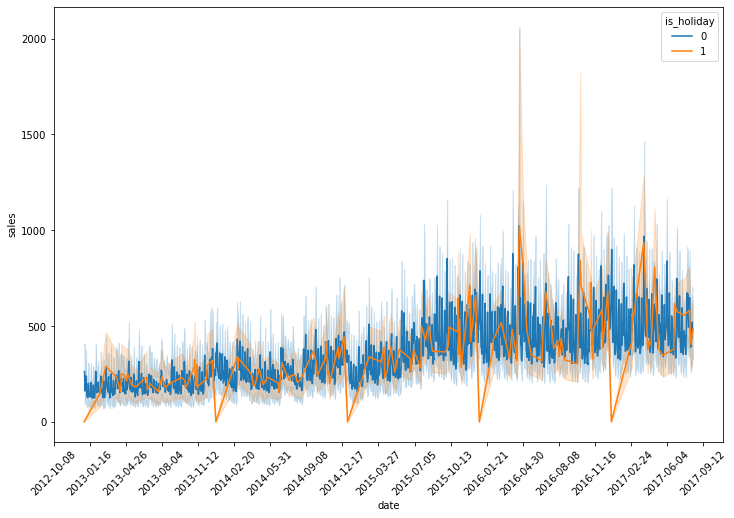

In [37]:
plt.figure(figsize = (12, 8))
ax = sns.lineplot(data = data_temp, x = 'date', y = 'sales', hue = 'is_holiday')
start, end = ax.get_xlim()
ax.set_xticks(np.arange(start, end, 100))
plt.xticks(rotation = 45);

## Oil price vs Sales

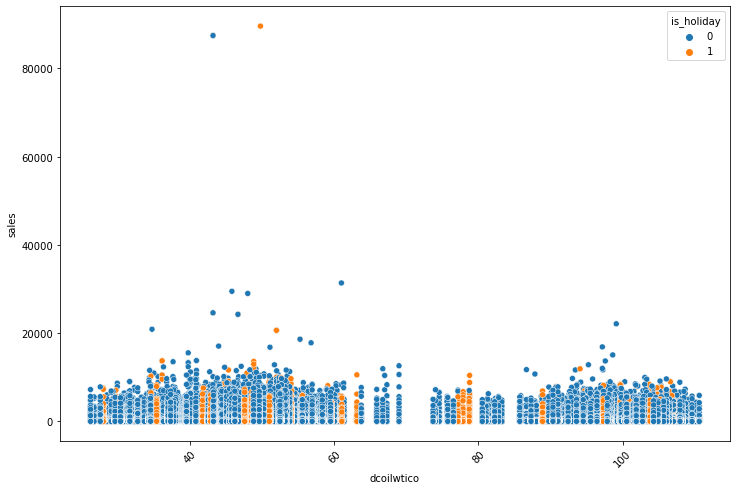

In [38]:
plt.figure(figsize = (12, 8))
sns.scatterplot(data = data_temp, x = 'dcoilwtico', y = 'sales', hue = 'is_holiday')
plt.xticks(rotation = 45);

## Test

In [14]:
test.head()

,id,date,store_nbr,family,onpromotion
0,3000888,2017-08-16,1,AUTOMOTIVE,0
1,3000889,2017-08-16,1,BABY CARE,0
2,3000890,2017-08-16,1,BEAUTY,2
3,3000891,2017-08-16,1,BEVERAGES,20
4,3000892,2017-08-16,1,BOOKS,0


In [15]:
## Appending oil prices and holiday
test = pd.merge(test, holidays, on = 'date', how = 'left')
test = pd.merge(test, oil, on = 'date', how = 'left')
test = pd.merge(test, stores, on = 'store_nbr', how = 'left')
test['date'] = pd.to_datetime(test['date'], format = '%Y-%m-%d')
test.head()

,id,date,store_nbr,family,onpromotion,holiday_type,locale,locale_name,description,transferred,dcoilwtico,city,state,store_type,cluster
0,3000888,2017-08-16,1,AUTOMOTIVE,0,NaN,NaN,NaN,NaN,NaN,46.8,Quito,Pichincha,D,13
1,3000889,2017-08-16,1,BABY CARE,0,NaN,NaN,NaN,NaN,NaN,46.8,Quito,Pichincha,D,13
2,3000890,2017-08-16,1,BEAUTY,2,NaN,NaN,NaN,NaN,NaN,46.8,Quito,Pichincha,D,13
3,3000891,2017-08-16,1,BEVERAGES,20,NaN,NaN,NaN,NaN,NaN,46.8,Quito,Pichincha,D,13
4,3000892,2017-08-16,1,BOOKS,0,NaN,NaN,NaN,NaN,NaN,46.8,Quito,Pichincha,D,13


In [16]:
test['cluster'].value_counts()

3     3696
10    3168
6     3168
15    2640
13    2112
14    2112
11    1584
4     1584
8     1584
1     1584
9     1056
2     1056
7     1056
16     528
5      528
12     528
17     528
Name: cluster, dtype: int64

In [17]:
pd.crosstab(train['store_type'], train['cluster'])

cluster,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
store_type,,,,,,,,,,,,,,,,,
A,0,0,0,0,56562,0,0,0,0,0,169686,0,0,226248,0,0,56562
B,0,0,0,0,0,339372,0,0,0,56562,0,0,0,0,0,56562,0
C,0,0,395934,0,0,0,113124,0,0,0,0,56562,0,0,282810,0,0
D,169686,113124,0,169686,0,0,0,169686,113124,56562,0,0,226248,0,0,0,0
E,0,0,0,0,0,0,0,0,0,226248,0,0,0,0,0,0,0


In [18]:
test['day'] = test['date'].dt.dayofweek
test['month'] = test['date'].dt.month
test['is_holiday'] = np.where(test['holiday_type'] == 'Holiday', 1, 0)
test.head()

,id,date,store_nbr,family,onpromotion,holiday_type,locale,locale_name,description,transferred,dcoilwtico,city,state,store_type,cluster,day,month,is_holiday
0,3000888,2017-08-16,1,AUTOMOTIVE,0,NaN,NaN,NaN,NaN,NaN,46.8,Quito,Pichincha,D,13,2,8,0
1,3000889,2017-08-16,1,BABY CARE,0,NaN,NaN,NaN,NaN,NaN,46.8,Quito,Pichincha,D,13,2,8,0
2,3000890,2017-08-16,1,BEAUTY,2,NaN,NaN,NaN,NaN,NaN,46.8,Quito,Pichincha,D,13,2,8,0
3,3000891,2017-08-16,1,BEVERAGES,20,NaN,NaN,NaN,NaN,NaN,46.8,Quito,Pichincha,D,13,2,8,0
4,3000892,2017-08-16,1,BOOKS,0,NaN,NaN,NaN,NaN,NaN,46.8,Quito,Pichincha,D,13,2,8,0


In [15]:
X_test = test[(test['store_nbr'] == 1) & (test['family'] == 'AUTOMOTIVE')][['onpromotion', 'dcoilwtico', 'is_holiday', 'day', 'month']]
X_test

,onpromotion,dcoilwtico,is_holiday,day,month
0,0,46.80,0,2,8
1782,0,47.07,0,3,8
3564,0,48.59,0,4,8
5346,0,NaN,0,5,8
7128,0,NaN,0,6,8
8910,0,47.39,0,0,8
10692,0,47.65,0,1,8
12474,0,48.45,0,2,8
14256,0,47.24,1,3,8
16038,0,47.65,0,4,8


## Building Baseline Model

In [19]:
pip install xgboost

Looking in indexes: https://pypi.org/simple, https://pip.repos.neuron.amazonaws.com
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 192.9/192.9 MB 5.1 MB/s eta 0:00:0000:0100:01
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [18]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor

X = data_temp[['onpromotion', 'dcoilwtico', 'is_holiday', 'day', 'month']]
Y = data_temp['sales']

## Defining the hyper-parameter grid
XGBoost_param_grid = {'n_estimators': [300],
                      'max_depth': [5, 7],
                      'min_child_weight': [5, 7, 10],
                      'learning_rate': [0.01, 0.001],
                      'gamma': [0.3, 0.1],
                      'subsample': [0.8, 1],
                      'colsample_bytree': [0.8, 1]}

## Performing grid search with 5 folds
XGBoost_grid_search = GridSearchCV(XGBRegressor(), XGBoost_param_grid, cv = 5, scoring = 'neg_mean_squared_log_error', n_jobs = -1, verbose = 1).fit(X, Y)

## Extracting the best score
best_score = XGBoost_grid_search.best_score_
print('The best mean squared log error:', best_score)

## Extracting the best model
XGBoost_md = XGBoost_grid_search.best_estimator_

## Predicting on test with best xgboost model 
xgb_pred = XGBoost_md.predict(X_test)
xgb_pred

Fitting 5 folds for each of 96 candidates, totalling 480 fits
The best mean squared log error: -0.44573063766447885


array([3.8159997, 4.047223 , 4.172874 , 3.4401114, 1.1745007, 3.9501214,
       4.085876 , 4.1465154, 3.761886 , 4.2257566, 3.4401114, 1.1745007,
       3.9553902, 4.1356444, 4.1100802, 3.7321296], dtype=float32)

# Baseline run

In [13]:
pip install xgboost

Looking in indexes: https://pypi.org/simple, https://pip.repos.neuron.amazonaws.com
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 192.9/192.9 MB 4.6 MB/s eta 0:00:0000:0100:01
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [ ]:
import boto3
import pandas as pd; pd.set_option('display.max_columns', 200)
import numpy as np
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor

s3 = boto3.resource('s3')
bucket_name = 'analytics-data-science-competitions'
bucket = s3.Bucket(bucket_name)

## Defining files names
file_key_1 = 'Store-Sales-Time-Series-Forecast/oil.csv'
file_key_2 = 'Store-Sales-Time-Series-Forecast/holidays_events.csv'
file_key_3 = 'Store-Sales-Time-Series-Forecast/stores.csv'
file_key_4 = 'Store-Sales-Time-Series-Forecast/transactions.csv'
file_key_5 = 'Store-Sales-Time-Series-Forecast/train.csv'
file_key_6 = 'Store-Sales-Time-Series-Forecast/test.csv'

bucket_object_1 = bucket.Object(file_key_1)
file_object_1 = bucket_object_1.get()
file_content_stream_1 = file_object_1.get('Body')

bucket_object_2 = bucket.Object(file_key_2)
file_object_2 = bucket_object_2.get()
file_content_stream_2 = file_object_2.get('Body')

bucket_object_3 = bucket.Object(file_key_3)
file_object_3 = bucket_object_3.get()
file_content_stream_3 = file_object_3.get('Body')

bucket_object_4 = bucket.Object(file_key_4)
file_object_4 = bucket_object_4.get()
file_content_stream_4 = file_object_4.get('Body')

bucket_object_5 = bucket.Object(file_key_5)
file_object_5 = bucket_object_5.get()
file_content_stream_5 = file_object_5.get('Body')

bucket_object_6 = bucket.Object(file_key_6)
file_object_6 = bucket_object_6.get()
file_content_stream_6 = file_object_6.get('Body')

## Reading data-files
oil = pd.read_csv(file_content_stream_1)
holidays = pd.read_csv(file_content_stream_2)
stores = pd.read_csv(file_content_stream_3)
transactions = pd.read_csv(file_content_stream_4)
train = pd.read_csv(file_content_stream_5)
test = pd.read_csv(file_content_stream_6)

## Changing feature labels in holidays and stores
holidays.columns = ['date', 'holiday_type', 'locale', 'locale_name', 'description', 'transferred']
stores.columns = ['store_nbr', 'city', 'state', 'store_type', 'cluster']

## Consolidating train data
train = pd.merge(train, oil, on = 'date', how = 'left')
train = pd.merge(train, holidays, on = 'date', how = 'left')
train = pd.merge(train, stores, on = 'store_nbr', how = 'left')
train['date'] = pd.to_datetime(train['date'], format = '%Y-%m-%d')
train = train[train['cluster'] == 3].reset_index(drop = True)

## Consolidating test data
test = pd.merge(test, holidays, on = 'date', how = 'left')
test = pd.merge(test, oil, on = 'date', how = 'left')
test = pd.merge(test, stores, on = 'store_nbr', how = 'left')
test['date'] = pd.to_datetime(test['date'], format = '%Y-%m-%d')
test = test[test['cluster'] == 3].reset_index(drop = True)

## Basic feature engineering 
train['day'] = train['date'].dt.dayofweek
train['month'] = train['date'].dt.month
train['is_holiday'] = np.where(train['holiday_type'] == 'Holiday', 1, 0)
train = train[['onpromotion', 'dcoilwtico', 'is_holiday', 'day', 'month', 'family', 'store_type', 'cluster', 'sales']]
train_dummies_1 = pd.get_dummies(train['family'])
train_dummies_2 = pd.get_dummies(train['store_type'])
train_dummies_3 = pd.get_dummies(train['cluster'])
train = pd.concat([train.drop(columns = ['family', 'store_type', 'cluster'], axis = 1), train_dummies_1, train_dummies_2, train_dummies_3], axis = 1)

test['day'] = test['date'].dt.dayofweek
test['month'] = test['date'].dt.month
test['is_holiday'] = np.where(test['holiday_type'] == 'Holiday', 1, 0)
test = test[['onpromotion', 'dcoilwtico', 'is_holiday', 'day', 'month', 'family', 'store_type', 'cluster']]
test_dummies_1 = pd.get_dummies(test['family'])
test_dummies_2 = pd.get_dummies(test['store_type'])
test_dummies_3 = pd.get_dummies(test['cluster'])
test = pd.concat([test.drop(columns = ['family', 'store_type', 'cluster'], axis = 1), test_dummies_1, test_dummies_2, test_dummies_3], axis = 1)

In [20]:
X = train.drop(columns = ['sales'], axis = 1)
Y = train['sales']

## Defining the hyper-parameter grid
XGBoost_param_grid = {'n_estimators': [300],
                      'max_depth': [5, 7],
                      'min_child_weight': [5, 7, 10],
                      'learning_rate': [0.01, 0.001],
                      'gamma': [0.3, 0.1],
                      'subsample': [0.8, 1],
                      'colsample_bytree': [0.8, 1]}

## Performing grid search with 5 folds
XGBoost_grid_search = GridSearchCV(XGBRegressor(), XGBoost_param_grid, cv = 5, scoring = 'neg_mean_squared_log_error', n_jobs = -1, verbose = 4).fit(X, Y)

## Extracting the best score
best_score = XGBoost_grid_search.best_score_
print('The best mean squared log error:', best_score)

## Extracting the best model
XGBoost_md = XGBoost_grid_search.best_estimator_

## Predicting on test with best xgboost model 
xgb_pred = XGBoost_md.predict(X_test)
xgb_pred

Fitting 5 folds for each of 96 candidates, totalling 480 fits


KeyboardInterrupt: 